In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
#digits dataset from scikit learn consists of 8x8 pixel images of digits

#Data plotting and visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
digits = load_digits() #load the dataset in digits
digits.data.shape

(1797, 64)

In [ ]:
digits.keys() #Dataset loaded is a dictionary
# data : flattened arrays/tensors used for clustering
# target : label associated with flattened array
#print(digits.target)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
digits.data[0:3]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [ ]:
k_means = KMeans(n_clusters=10,random_state=0, n_init='auto')
clusters = k_means.fit_predict(digits.data) #run KMeans clustering on digits.data for 1797 records and 64 features
k_means.cluster_centers_.shape

(10, 64)

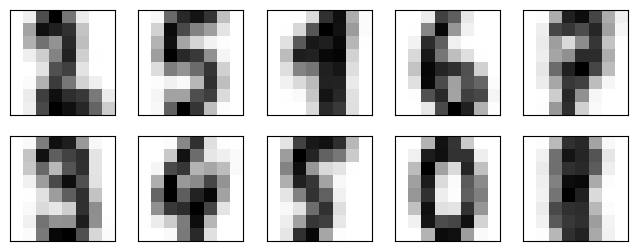

In [ ]:
fig, ax = plt.subplots(2, 5, figsize = (8,3)) #Create a figure and a set of subplots( 2 rows and 5 columns)
centers = k_means.cluster_centers_.reshape(10,8,8)
#flattened image can't be viewed, re-transform/reshape/inverse transform it to original form to view matrix shaped image
#reshape 10 rows of clusters (k_means.cluster_centers_ = 10,64) and 64 to 8 * 8 matrix
for axi, center in zip(ax.flat, centers): #ax.flat:flattening the image & plotting relevant centers
    axi.set(xticks = [], yticks = [])
    axi.imshow(center, interpolation='nearest',cmap = plt.cm.binary) #imshow(matplotlib method) to render the image in notebook


In [ ]:
labels = np.zeros_like(clusters) # blank labels
print(f"The labels are : {labels}")
print(f"\nThe size of labels is : {labels.shape}")
print("The mask values are : ")
for i in range(10):
    mask = (clusters == i)
    #if a specific digit belongs to/equivalent a specific cluster then its True else False
    print(mask)
    labels[mask] = mode(digits.target[mask])[0]

The labels are : [0 0 0 ... 0 0 0]

The size of labels is : (1797,)
The mask values are : 
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False  True  True]
[False False False ... False False False]
[False False False ... False False False]
[ True False False ... False False False]
[False  True  True ...  True False False]


In [ ]:
#if a specific digit belongs to/equivalent a specific cluster then acuracy is 1 else 0
accuracy = "{:.2f}".format(accuracy_score(digits.target, labels)*100)
print(f"Accuracy: {accuracy}%")

Accuracy: 74.40%


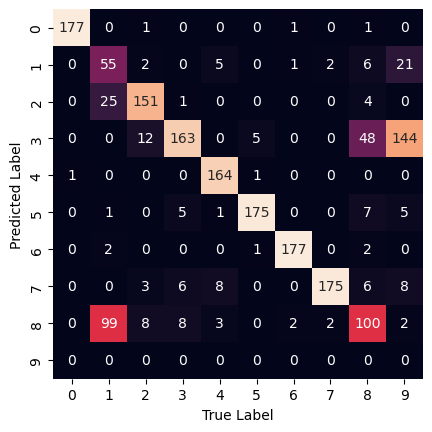

In [ ]:
matrix = confusion_matrix(digits.target, labels)
sns.heatmap(matrix.T, square = True, annot = True,
           fmt = 'd', cbar=False,
           xticklabels=digits.target_names,
           yticklabels=digits.target_names)
plt.xlabel('True Label')
plt.ylabel("Predicted Label")
plt.show()

In [ ]:
#if a specific digit belongs to/equivalent a specific cluster then acuracy is 1 else 0
accuracy = "{:.2f}".format(accuracy_score(digits.target, clusters)*100)
print(f"Accuracy: {accuracy}%")

Accuracy: 1.00%


## Estratégia de Normalização:

Esses modelos são muito vulneráveis a escala dos dados, sendo comum então uma padronização dos dados. A estratéga utilizada aqui foi a normalização, ou seja,

$$X_{norm} = \frac{x_i - \mu}{\sigma}$$

In [ ]:
# Função para normalizar os dados
def normalize_data(X):
    '''
    Normaliza os dados para ter média 0 e desvio padrão 1.

    # Entrada:
    numpy.ndarray: Matriz dos dados.

    # Saída:
    numpy.ndarray: Matriz dos dados normalizados.
    '''
    dados_normalizados = []
    for data_point in X.T: # Eu acho mais fácil trabalhar com variáveis como linhas.
        mean = np.mean(data_point)
        std = np.std(data_point)
        data_point_normalizado = [(valor - mean) / std for valor in data_point]
        dados_normalizados.append(data_point_normalizado)

    return np.array(dados_normalizados).T  # Transpondo de volta

## Inicialização dos Centroides:

Os centroides são iniciados aleatóriamente. Existem formas mais interessantes de se inicializar o k-means, como o k-mean++ porém, a título de algorítmo inicial, apliquei a inicialização mais simples.

In [ ]:
def initialize_centroids(X, K):
  '''
    Função criada para normalizar inicializar
  os centroides.

  # Entrada:
  numpy.ndarray: Matriz dos dados.
  int: Número de clusters.

  # Saída:
  numpy.ndarray: Matriz dos centróides.

  '''
  # Seleciona K pontos aleatórios do conjunto de dados como centróides iniciais
  indices = np.random.choice(X.shape[0], K, replace=False)
  centroids = X[indices]
  return centroids

## Função de Perda:

A Função de Perda do modelo é a **distorção**, soma dos quadrados da distância utilizando **Norma L2**, definida como _inertia_ no sklearn, que se dá por,

$$\text{Loss} = \sum_{i=0}^n\min_{\mu_j \in C}(||x_i-\mu_j||^2)$$

In [ ]:
def compute_loss(X, centroids, cluster_assignments):
    '''
    Calcula a distorção (erro de reconstrução) no algoritmo K-means.

    # Entradas:
    numpy.ndarray: Matriz de dados X com formato (N, D), onde N é o número de pontos e D é o número de dimensões.
    numpy.ndarray: Matriz de centróides com formato (K, D), onde K é o número de clusters e D é o número de dimensões.
    numpy.ndarray: Array de tamanho N contendo o índice do cluster para cada ponto.

    # Saída:
    num: O valor da distorção, que é a soma das distâncias ao quadrado entre cada ponto e seu centroide correspondente.
    '''
    # Calcula a distorção (erro de reconstrução)
    loss = np.sum((X - centroids[cluster_assignments])**2)
    return loss

## Processo de Atualização dos Centroids:

A função `assign_clusters` é responsável por atribuir os centroids e a `update_centroids` por atualiza-los.


**Nota:**
A função `np.linalg.norm` é utilizada para calcular normas de vetores ou matrizes, que são essencialmente medidas de magnitude ou distância, no caso aqui ela é a responsável por calcular a **Distância Euclidiana**.

In [ ]:
def assign_clusters(X, centroids):
  '''
  Atribui cada ponto de dados ao centroide mais próximo.

  # Entradas:
  numpy.ndarray: Matriz de dados X com formato (N, D), onde N é o número de pontos e D é o número de dimensões.
  numpy.ndarray: Matriz de centróides com formato (K, D), onde K é o número de clusters e D é o número de dimensões.

  # Saída:
  numpy.ndarray: Array de tamanho N contendo o índice do cluster mais próximo para cada ponto.
  '''
  # Atribui cada ponto de dados ao centroide mais próximo
  distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
  cluster_assignments = np.argmin(distances, axis=1)
  return cluster_assignments

In [ ]:
def update_centroids(X, cluster_assignments, K):
  '''
  Atualiza os centróides calculando a média dos pontos atribuídos a cada centroide.

  # Entradas:
  numpy.ndarray: Matriz de dados X com formato (N, D), onde N é o número de pontos e D é o número de dimensões.
  numpy.ndarray: Array de tamanho N contendo o índice do cluster mais próximo para cada ponto.
  int: Número de clusters.

  # Saída:
  numpy.ndarray: Matriz de centróides com formato (K, D), onde K é o número de clusters e D é o número de dimensões.
  '''
  # Atualiza os centróides calculando a média dos pontos atribuídos a cada centroide
  centroids = np.array([X[cluster_assignments == k].mean(axis=0) for k in range(K)])
  return centroids

## Implementação do algorítmo:

A função `k_means` funciona como uma espécie de main, ou seja, é a função que implementa de fato o algortimo.

In [ ]:
def k_means(X, K, max_iters=100, tol=1e-4):
  '''
  Implementação do Algoritmo.

  # Entradas:
  numpy.ndarray: Matriz de dados X com formato (N, D), onde N é o número de pontos e D é o número de dimensões.
  int: Número de clusters.
  int: Número máximo de iterações

  # Saída:
  numpy.ndarray: Matriz de centróides com formato (K, D), onde K é o número de clusters e D é o número de dimensões.
  numpy.ndarray: Array de tamanho N contendo o índice do cluster para cada ponto.
  '''
  # Inicializa os centróides
  centroids = initialize_centroids(X, K)
  for i in range(max_iters):
      # Atribui os pontos de dados aos centróides mais próximos
      cluster_assignments = assign_clusters(X, centroids)
      # Calcula os novos centróides
      new_centroids = update_centroids(X, cluster_assignments, K)
      # Verifica a convergência (se os centróides mudaram pouco)
      if np.linalg.norm(new_centroids - centroids) < tol:
          break
      centroids = new_centroids
  # Calcula a distorção final
  final_loss = compute_loss(X, centroids, cluster_assignments)
  return centroids, cluster_assignments, final_loss

In [ ]:
# Executa o algoritmo K-means
centroids, cluster_assignments, final_loss = k_means(digits.data, 10)

In [ ]:
labels = np.zeros_like(cluster_assignments) # blank labels
print(f"The labels are : {labels}")
print(f"\nThe size of labels is : {labels.shape}")
print("The mask values are : ")
for i in range(10):
    mask = (cluster_assignments == i)
    #if a specific digit belongs to/equivalent a specific cluster then its True else False
    print(mask)
    labels[mask] = mode(digits.target[mask])[0]

The labels are : [0 0 0 ... 0 0 0]

The size of labels is : (1797,)
The mask values are : 
[ True False False ... False False False]
[False False False ... False False False]
[False False False ... False  True False]
[False False False ... False False False]
[False False False ... False False False]
[False  True False ... False False False]
[False False  True ...  True False  True]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]


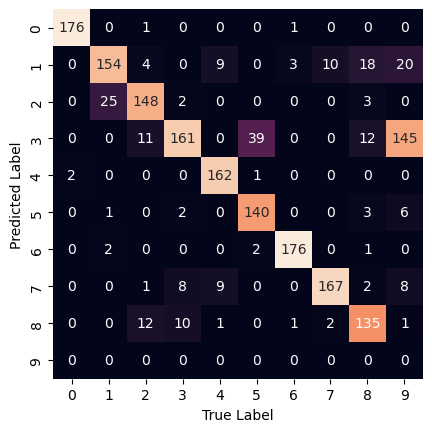

In [ ]:
matrix = confusion_matrix(digits.target, labels)
sns.heatmap(matrix.T, square = True, annot = True,
           fmt = 'd', cbar=False,
           xticklabels=digits.target_names,
           yticklabels=digits.target_names)
plt.xlabel('True Label')
plt.ylabel("Predicted Label")
plt.show()

In [ ]:
#if a specific digit belongs to/equivalent a specific cluster then acuracy is 1 else 0
accuracy = "{:.2f}".format(accuracy_score(digits.target, labels)*100)
print(f"Accuracy: {accuracy}%")

Accuracy: 78.96%
